# Turbulent boundary layer statistics

We are looking for LSMs in a ZPGTBL. 

- Balakumar, Adrian:
They perform experiments of a ZPGTBL at Re_tau = 1476 and Re_tau = 2395 and report similar LSMs/VLSMs containing large fractions of TKE

- Rahgoza, Maciel:
DNS of a ZPGTBL at Re_theta = 4300. Assess visually the existence of hairpins and hairpin packets in the outer region.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
np.set_printoptions(precision=6)

# %matplotlib inline
%matplotlib notebook
%load_ext autoreload
%autoreload 2

## First, import the mean velocity profiles for x = 8, 10, 12, 14, 16, 18

Collected from $t = 120$ to $t = 240$.

In [2]:
# case_path = 'turbulent_boundary_layer_DNS_Re_theta_1100'
# nu = 1./12000.

case_path = 'turbulent_boundary_layer_LES_Re_theta_2000'
nu = 1./24000.


In [8]:
# nlines = 6
nlines = 11
npts = 200
Uinf = 1.0
rho = 1.0

# mean_data = np.loadtxt(os.path.join(case_path, 'mean_prof.dat'))
# fluc_data = np.loadtxt(os.path.join(case_path, 'vel_fluc_prof.dat'))
statistics_data = np.loadtxt(os.path.join(case_path, 'statistics_prof.dat'))

# y, y+ = y * Re_tau, u, u+ = u / u_tau
# y, yp, u, up = (mean_data[:,i].reshape(nlines,-1) for i in range(4))
# uu, vv, ww, uv = (fluc_data[:,i].reshape(nlines,-1) for i in range(2,6))
y, yp, u, up, vp, wp, uu, vv, ww, uv = (statistics_data[:,i].reshape(nlines,-1) for i in range(10))

# Re_tau = u_tau / nu
Re_tau = yp[:,5]/y[:,5]
u_tau = Re_tau * nu
C_f = 2 * u_tau**2 / Uinf**2

## Compute momentum thickness $\theta$

In [9]:
theta = np.zeros(nlines)
def f_theta(x):
    return x / Uinf * (1 - x / Uinf)

for i in range(nlines):
    theta[i] += 0.5 * f_theta(u[i,0]) * (y[i,1] - y[i,0])
    theta[i] += 0.5 * f_theta(u[i,-1]) * (y[i,-1] - y[i,-2])
    for j in range(1,npts-1):
        theta[i] += 0.5 * f_theta(u[i,j]) * (y[i,j+1] - y[i,j-1])

Re_theta = Uinf * theta / nu


In [10]:
print('Re_tau =   ', Re_tau)
print('u_tau =    ', u_tau)
print('C_f =      ', C_f)
print('theta =    ', theta)
print('Re_theta = ', Re_theta)

Re_tau =    [1150.143673 1138.647746 1120.348671 1105.785742 1094.082578 1080.955037
 1070.892139 1060.715542 1052.411885 1040.259147 1030.695035]
u_tau =     [0.047923 0.047444 0.046681 0.046074 0.045587 0.04504  0.044621 0.044196
 0.04385  0.043344 0.042946]
C_f =       [0.004593 0.004502 0.004358 0.004246 0.004156 0.004057 0.003982 0.003907
 0.003846 0.003757 0.003689]
theta =     [0.054052 0.053657 0.054679 0.056962 0.060065 0.063539 0.067246 0.071118
 0.07505  0.079113 0.083307]
Re_theta =  [1297.237369 1287.760736 1312.295738 1367.08266  1441.552878 1524.942728
 1613.914168 1706.831312 1801.196511 1898.709627 1999.366888]


## Compute x from empirical formula

$$ \theta / x = 0.037 / Re_x^{1/5} $$

In [11]:
x = (theta / 0.037 * (Uinf/nu)**0.2)**1.25
print('x = ', x)

x =  [19.989914 19.807542 20.280388 21.344209 22.80735  24.468284 26.265589
 28.169222 30.129226 32.18176  34.328294]


## Profiles from Sillero, Jimenez

In [12]:
# Re_theta = 1100
data_ref_1100 = np.loadtxt('data/statistics/Re_theta.1100.prof')
yp_ref_1100, up_ref_1100, vp_ref_1100, uu_ref_1100, vv_ref_1100, ww_ref_1100, uv_ref_1100 = data_ref_1100[:,1], data_ref_1100[:,6], data_ref_1100[:,7], data_ref_1100[:,2], data_ref_1100[:,3], data_ref_1100[:,4], data_ref_1100[:,5]

# Re_theta = 1551
data_ref_1551 = np.loadtxt('data/statistics/Re_theta.1551.prof')
yp_ref_1551, up_ref_1551 = data_ref_1551[:,1], data_ref_1551[:,6]
yp_ref_1551, up_ref_1551, uu_ref_1551, vv_ref_1551, ww_ref_1551, uv_ref_1551 = data_ref_1551[:,1], data_ref_1551[:,6], data_ref_1551[:,2], data_ref_1551[:,3], data_ref_1551[:,4], data_ref_1551[:,5]

# Re_theta = 1968
data_ref_1968 = np.loadtxt('data/statistics/Re_theta.1968.prof')
yp_ref_1968, up_ref_1968 = data_ref_1968[:,1], data_ref_1968[:,6]
yp_ref_1968, up_ref_1968, uu_ref_1968, vv_ref_1968, ww_ref_1968, uv_ref_1968 = data_ref_1968[:,1], data_ref_1968[:,6], data_ref_1968[:,2], data_ref_1968[:,3], data_ref_1968[:,4], data_ref_1968[:,5]

# Re_theta = 4000
data_ref_4000 = h5py.File('data/statistics/pdf_u_4000.h5', 'r')
yp_ref_4000, up_ref_4000 = np.array(data_ref_4000['ygp']), np.array(data_ref_4000['mean'])

# Re_theta = 5000
data_ref_5000 = h5py.File('data/statistics/pdf_u_5000.h5', 'r')
yp_ref_5000, up_ref_5000 = np.array(data_ref_5000['ygp']), np.array(data_ref_5000['mean'])



## Plot mean velocity profiles

In [13]:
kappa = 0.41
B = 5.0
up_log_law = 1 / kappa * np.log(yp[0]) + B

<IPython.core.display.Javascript object>


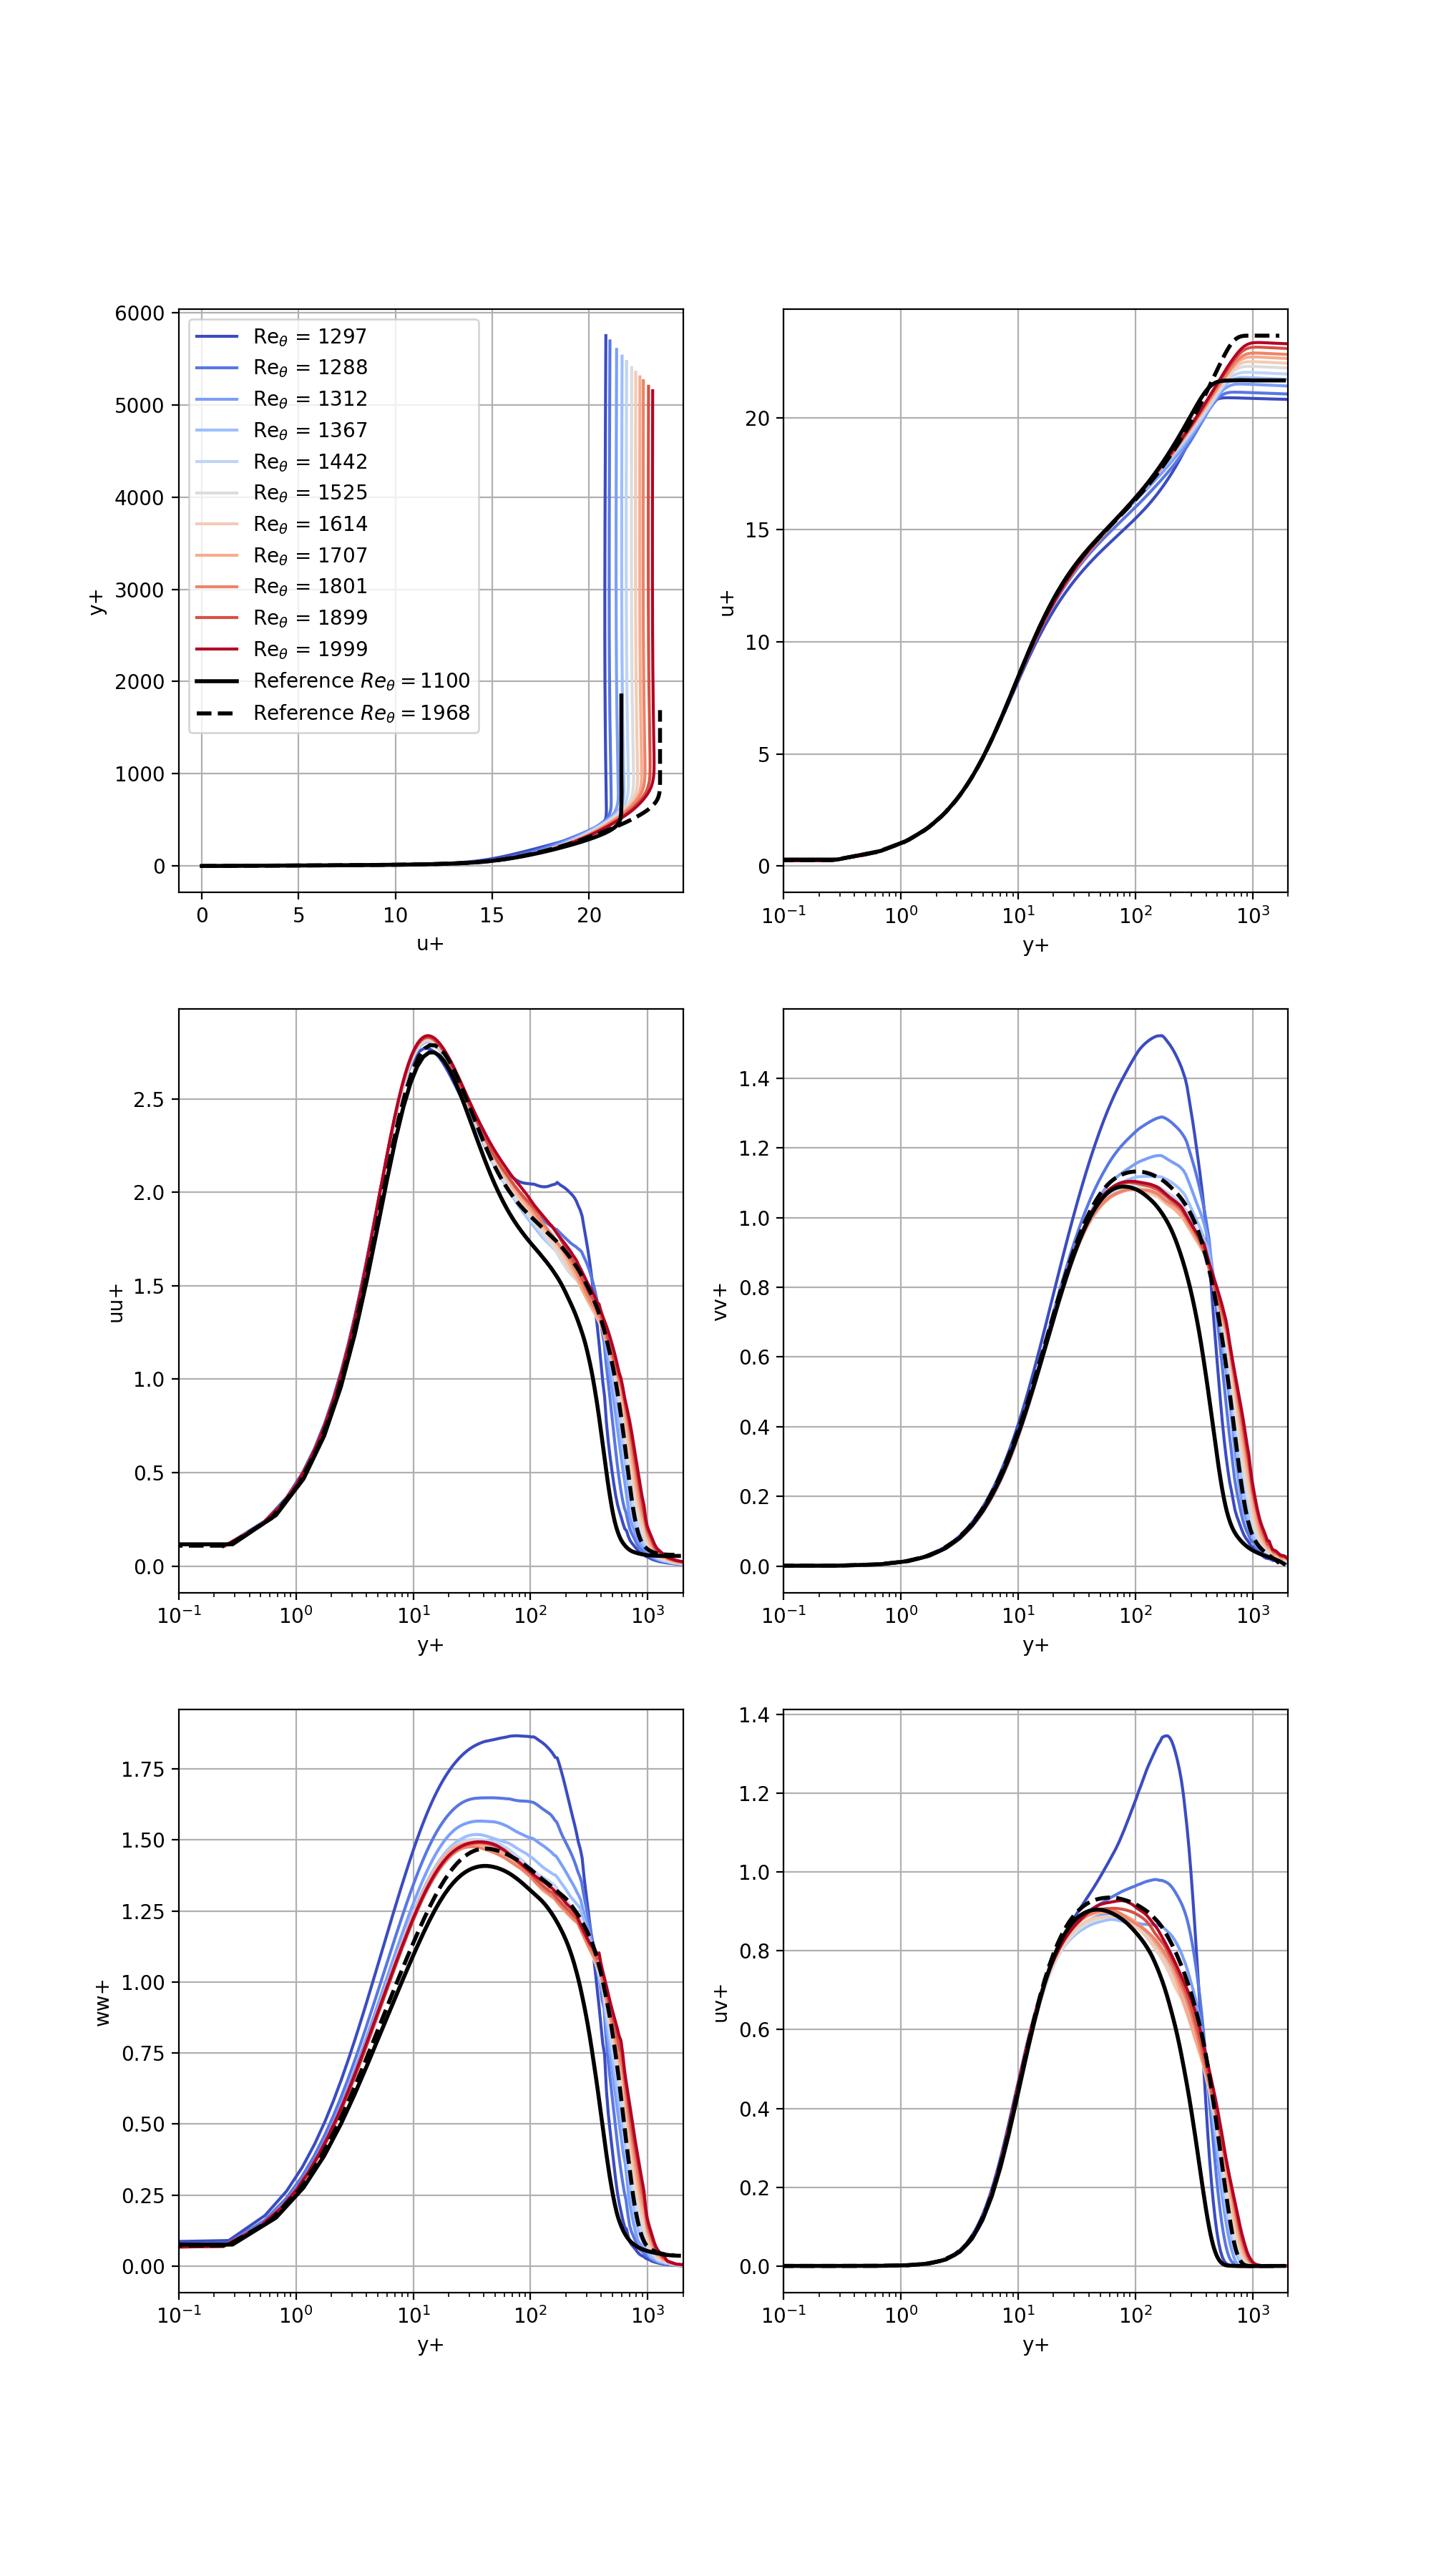

/tmp/ipykernel_362306/1639346452.py:57: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(yp[i,:nlim], np.sqrt(uu[i,:nlim]), label=labels[i])
/tmp/ipykernel_362306/1639346452.py:57: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(yp[i,:nlim], np.sqrt(uu[i,:nlim]), label=labels[i])
/tmp/ipykernel_362306/1639346452.py:57: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(yp[i,:nlim], np.sqrt(uu[i,:nlim]), label=labels[i])
/tmp/ipykernel_362306/1639346452.py:57: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(yp[i,:nlim], np.sqrt(uu[i,:nlim]), label=labels[i])
/tmp/ipykernel_362306/1639346452.py:57: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(yp[i,:nlim], np.sqrt(uu[i,:nlim]), label=labels[i])
/tmp/ipykernel_362306/1639346452.py:57: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(yp[i,:nlim], np.sqrt(uu[i,:nlim]), label=labels[i])
/tmp/ipykernel_362306/1639346452.py:57: RuntimeWarning: invalid value encountered in sqr

In [17]:
N = 11
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,N)))

fig = plt.figure(figsize=(10,18))
nlim = 200
labels = ['Re$_\\theta$ = %4.0f'%Re_theta[i] for i in range(nlines)]

# ---------------------------------------------
# # Linear scale - exact units
# ax = fig.add_subplot(421)
# for i in range(nlines):
#     ax.plot(u[i,:nlim], y[i,:nlim], label=labels[i])
# ax.set_xlabel('u')
# ax.set_ylabel('y')
# ax.legend()
# ax.grid(True)

# ---------------------------------------------
# Linear scale
ax = fig.add_subplot(321)
for i in range(nlines):
    ax.plot(up[i,:nlim], yp[i,:nlim], label=labels[i])
ax.plot(up_ref_1100, yp_ref_1100, c='k', lw=2, ls='-', label='Reference $Re_\\theta = 1100$', zorder=20)
# ax.plot(up_ref_1551, yp_ref_1551, c='k', lw=2, ls='--', label='Reference $Re_\\theta = 1551$', zorder=20)
ax.plot(up_ref_1968, yp_ref_1968, c='k', lw=2, ls='--', label='Reference $Re_\\theta = 1968$', zorder=20)

ax.set_xlabel('u+')
ax.set_ylabel('y+')
ax.legend()
ax.grid(True)

# ---------------------------------------------
# Logarithmic scale
ax = fig.add_subplot(322)
for i in range(nlines):
    ax.plot(yp[i,:nlim], up[i,:nlim], label=labels[i])

# Log-law
# ax.plot(yp[0,1:], up_log_law[1:], c='k', lw=2, label='log-law')

# Reference (Jimenez, Sillero)
ax.plot(yp_ref_1100, up_ref_1100, c='k', lw=2, ls='-', label='Reference $Re_\\theta = 1100$', zorder=20)
# ax.plot(yp_ref_1551, up_ref_1551, c='k', lw=2, ls='--', label='Reference $Re_\\theta = 1551$', zorder=20)
ax.plot(yp_ref_1968, up_ref_1968, c='k', lw=2, ls='--', label='Reference $Re_\\theta = 1968$', zorder=20)

ax.set_xscale('log')
ax.set_xlabel('y+')
ax.set_ylabel('u+')
ax.set_xlim([0.1,2000])
# ax.legend()
ax.grid(True)

# ---------------------------------------------
# uu
ax = fig.add_subplot(323)
for i in range(nlines):
    ax.plot(yp[i,:nlim], np.sqrt(uu[i,:nlim]), label=labels[i])

# Reference (Jimenez, Sillero)
ax.plot(yp_ref_1100, uu_ref_1100, c='k', lw=2, ls='-', label='Reference $Re_\\theta = 1100$', zorder=20)
# ax.plot(yp_ref_1551, uu_ref_1551, c='k', lw=2, ls='--', label='Reference $Re_\\theta = 1551$', zorder=20)
ax.plot(yp_ref_1968, uu_ref_1968, c='k', lw=2, ls='--', label='Reference $Re_\\theta = 1968$', zorder=20)

ax.set_xscale('log')
ax.set_xlabel('y+')
ax.set_ylabel('uu+')
ax.set_xlim([0.1,2000])

# ax.legend()
ax.grid(True)

# ---------------------------------------------
# vv
ax = fig.add_subplot(324)
for i in range(nlines):
    ax.plot(yp[i,:nlim], np.sqrt(vv[i,:nlim]), label=labels[i])

# Reference (Jimenez, Sillero)
ax.plot(yp_ref_1100, vv_ref_1100, c='k', lw=2, ls='-', label='Reference $Re_\\theta = 1100$', zorder=20)
# ax.plot(yp_ref_1551, vv_ref_1551, c='k', lw=2, ls='--', label='Reference $Re_\\theta = 1551$', zorder=20)
ax.plot(yp_ref_1968, vv_ref_1968, c='k', lw=2, ls='--', label='Reference $Re_\\theta = 1968$', zorder=20)

ax.set_xscale('log')
ax.set_xlabel('y+')
ax.set_ylabel('vv+')
ax.set_xlim([0.1,2000])

# ax.legend()
ax.grid(True)

# ---------------------------------------------
# ww
ax = fig.add_subplot(325)
for i in range(nlines):
    ax.plot(yp[i,:nlim], np.sqrt(ww[i,:nlim]), label=labels[i])

# Reference (Jimenez, Sillero)
ax.plot(yp_ref_1100, ww_ref_1100, c='k', lw=2, ls='-', label='Reference $Re_\\theta = 1100$', zorder=20)
# ax.plot(yp_ref_1551, ww_ref_1551, c='k', lw=2, ls='--', label='Reference $Re_\\theta = 1551$', zorder=20)
ax.plot(yp_ref_1968, ww_ref_1968, c='k', lw=2, ls='--', label='Reference $Re_\\theta = 1968$', zorder=20)

ax.set_xscale('log')
ax.set_xlabel('y+')
ax.set_ylabel('ww+')
ax.set_xlim([0.1,2000])

# ax.legend()
ax.grid(True)

# ---------------------------------------------
# uv
ax = fig.add_subplot(326)
for i in range(nlines):
    ax.plot(yp[i,:nlim], -uv[i,:nlim], label=labels[i])

# Reference (Jimenez, Sillero)
ax.plot(yp_ref_1100, -uv_ref_1100, c='k', lw=2, ls='-', label='Reference $Re_\\theta = 1100$', zorder=20)
# ax.plot(yp_ref_1551, -uv_ref_1551, c='k', lw=2, ls='--', label='Reference $Re_\\theta = 1551$', zorder=20)
ax.plot(yp_ref_1968, -uv_ref_1968, c='k', lw=2, ls='--', label='Reference $Re_\\theta = 1968$', zorder=20)

ax.set_xscale('log')
ax.set_xlabel('y+')
ax.set_ylabel('uv+')
ax.set_xlim([0.1,2000])

# ax.legend()
ax.grid(True)

plt.savefig(case_path + '/statistics_plots.pdf')
# plt.savefig('Re_theta_800_to_1200_prof.pdf')

## Mesh Design

- ny=20, ymax=20, betam=4.3
- ny=16, ymax=3, betam=3.3

In [183]:
ny = 16
lx = 7
betam = 3.7
ymin = 0
ymax = 5
yi = np.linspace(0,1,ny*lx + 1)
y = ymin + (ymax - ymin) * (np.tanh(betam * (yi-1)) / np.tanh(betam) + 1)

<IPython.core.display.Javascript object>


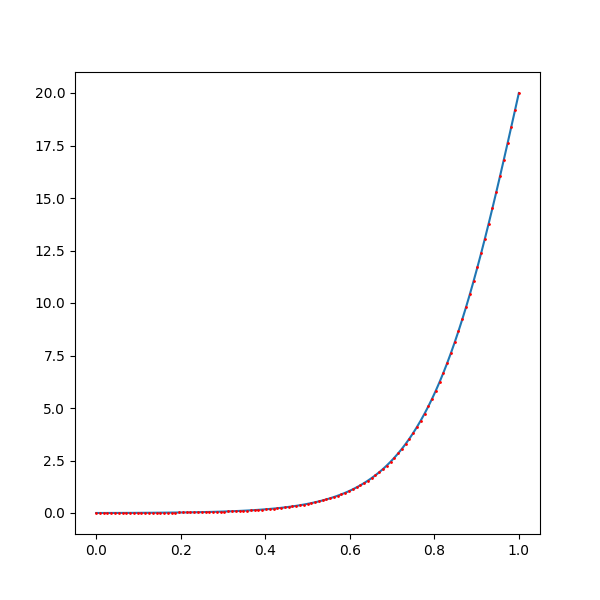

In [243]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

ax.plot(yi,y)
ax.scatter(yi,y,s=1,c='r',zorder=10)